In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yfin
from pandas_datareader import data as pdr
yfin.pdr_override()
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
data = yfin.download('btc-usd',start = '2017-1-1')['Adj Close']
data.to_frame

[*********************100%***********************]  1 of 1 completed


<bound method Series.to_frame of Date
2016-12-31      963.742981
2017-01-01      998.325012
2017-01-02     1021.750000
2017-01-03     1043.839966
2017-01-04     1154.729980
                  ...     
2022-04-26    38117.460938
2022-04-27    39241.121094
2022-04-28    39773.828125
2022-04-29    38609.824219
2022-04-30    38430.359375
Name: Adj Close, Length: 1947, dtype: float64>

In [3]:
#Train test Split
to_row = int(len(data)*0.9)
training_data = list(data[0:to_row])
testing_data =  list(data[to_row:])

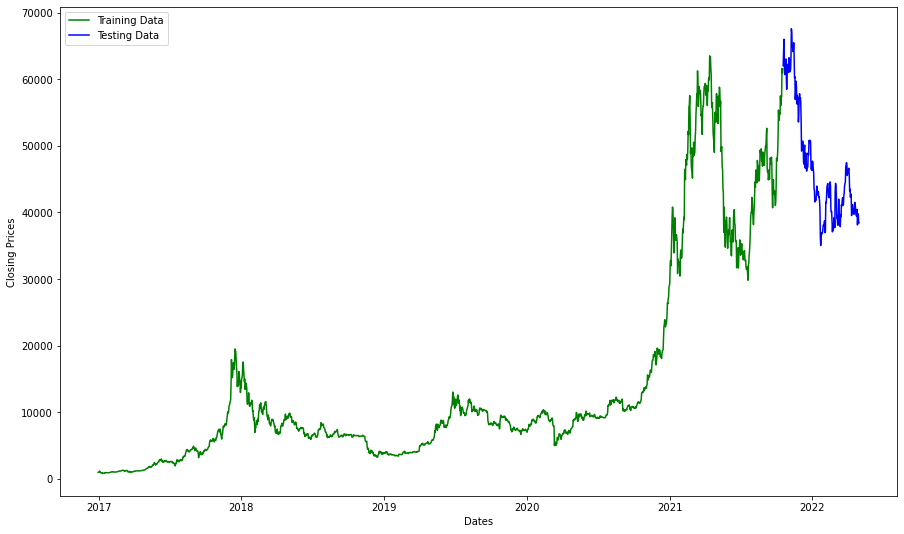

In [4]:
plt.figure(figsize=(15,9))
plt.grid = True
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data[0:to_row], 'green', label = 'Training Data')
plt.plot(data[to_row:], 'blue', label = 'Testing Data')
plt.legend()

In [5]:
model_predictions = []
n_test_obser = len(testing_data)


In [6]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  

In [7]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1945
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -16091.067
Method:                       css-mle   S.D. of innovations            947.761
Date:                Sun, 01 May 2022   AIC                          32194.134
Time:                        01:25:16   BIC                          32227.572
Sample:                             1   HQIC                         32206.429
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3553     21.806      0.888      0.375     -23.384      62.095
ar.L1.D.y     -0.0265      0.023     -1.169      0.242      -0.071       0.018
ar.L2.D.y     -0.0064      0.023     -0.280      0.7

<function matplotlib.pyplot.show(*args, **kw)>

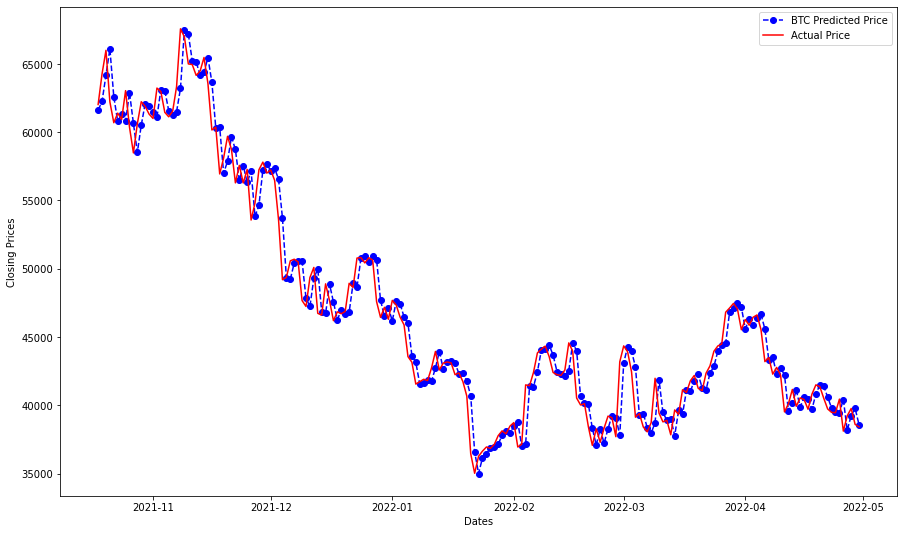

In [8]:
plt.figure(figsize=(15,9))


date_range = data[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'Actual Price')

plt.title = ('Bitcoin Price Prediction'  )
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
plt.show

In [9]:
#performance report
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
mape

0.023858792425294484

In [10]:
tickers = ('btc-usd','eth-usd')
mar_data = yfin.download( tickers ,start = '2018-1-1')['Adj Close']
mar_data

[*********************100%***********************]  2 of 2 completed


,BTC-USD,ETH-USD
Date,,
2017-12-31,14156.400391,756.732971
2018-01-01,13657.200195,772.640991
2018-01-02,14982.099609,884.443970
2018-01-03,15201.000000,962.719971
2018-01-04,15599.200195,980.921997
...,...,...
2022-04-26,38117.460938,2808.298340
2022-04-27,39241.121094,2888.929688
2022-04-28,39773.828125,2936.940918


In [11]:
log_rets2 = np.log(mar_data/mar_data.shift())
log_rets2

,BTC-USD,ETH-USD
Date,,
2017-12-31,NaN,NaN
2018-01-01,-0.035900,0.020804
2018-01-02,0.092589,0.135145
2018-01-03,0.014505,0.084803
2018-01-04,0.025858,0.018730
...,...,...
2022-04-26,-0.059600,-0.069160
2022-04-27,0.029053,0.028307
2022-04-28,0.013484,0.016482


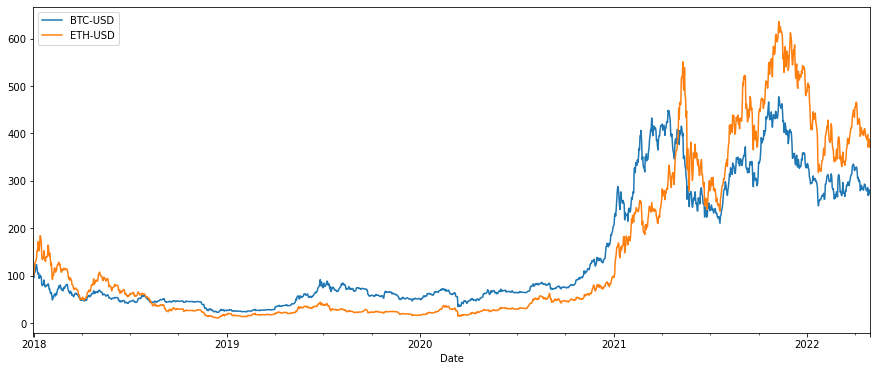

In [12]:
(mar_data/mar_data.iloc[0]*100).plot(figsize = (15,6))

In [13]:
log_rets2.mean()*250

BTC-USD    0.157919
ETH-USD    0.206736
dtype: float64

In [14]:
log_rets2.cov()*250

,BTC-USD,ETH-USD
BTC-USD,0.394627,0.418632
ETH-USD,0.418632,0.655159


In [15]:
log_rets2.corr()
#For trusting results should be more than 30%

,BTC-USD,ETH-USD
BTC-USD,1.000000,0.823313
ETH-USD,0.823313,1.000000


In [16]:
num_assets = len(tickers)
num_assets

2

In [17]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.20857021, 0.79142979])

In [18]:
exp_rets = np.sum(weights*log_rets2.mean())*250
exp_rets

0.19655443096361067

In [19]:
exp_var = np.dot(weights.T, np.dot(log_rets2.cov()*250, weights))
exp_var

0.5657388857209489

In [20]:
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_rets2.cov()*250, weights)))
exp_vol

0.7521561578029851

In [21]:
pfolio_returns = []
pfolio_volatilities = []
btc_weight = []
eth_weight = []


for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_rets2.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_rets2.cov() * 250, weights))))
    btc_weight.append(weights[0])
    eth_weight.append(weights[1])

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
btc_weight = np.array(btc_weight)

pfolio_returns, pfolio_volatilities

(array([0.19267044, 0.15940518, 0.1646199 , 0.19332482, 0.1586689 ,
        0.1908792 , 0.18554544, 0.16720963, 0.18242725, 0.18048351,
        0.16176159, 0.16799614, 0.17012508, 0.19113649, 0.17898295,
        0.18431638, 0.20411774, 0.17383958, 0.16262192, 0.16594677,
        0.18896358, 0.18716319, 0.1980818 , 0.16868593, 0.18355396,
        0.18774561, 0.18857413, 0.17757743, 0.17962098, 0.18016938,
        0.17229694, 0.19077162, 0.19471125, 0.1631467 , 0.19248436,
        0.20007421, 0.19573778, 0.17399447, 0.17299784, 0.18736597,
        0.19831826, 0.20115746, 0.20143504, 0.17377219, 0.1893004 ,
        0.18383736, 0.19924518, 0.18024333, 0.1794496 , 0.19220354,
        0.17649201, 0.18347848, 0.20601011, 0.1837581 , 0.16109974,
        0.19969957, 0.16785527, 0.2042975 , 0.17458138, 0.19368871,
        0.17712271, 0.18047103, 0.19011446, 0.18780246, 0.16216801,
        0.19723   , 0.18142589, 0.17268809, 0.18598765, 0.18504631,
        0.1660617 , 0.17935828, 0.20140518, 0.16

In [22]:
portfolio = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities, 'BTC Weight':btc_weight, 'ETH Weight':eth_weight})
portfolio

,Return,Volatility,BTC Weight,ETH Weight
0,0.192670,0.732462,0.288133,0.711867
1,0.159405,0.629512,0.969560,0.030440
2,0.164620,0.636570,0.862738,0.137262
3,0.193325,0.735689,0.274728,0.725272
4,0.158669,0.628820,0.984642,0.015358
...,...,...,...,...
995,0.178418,0.672501,0.580098,0.419902
996,0.192609,0.732160,0.289393,0.710607
997,0.180241,0.678980,0.542749,0.457251
998,0.192307,0.730686,0.295577,0.704423


Text(0, 0.5, 'Expected Return')

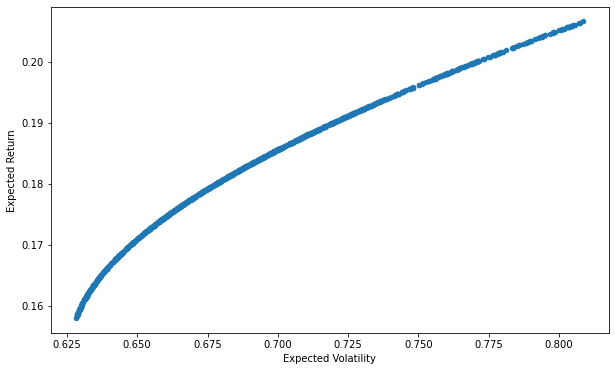

In [23]:
portfolio.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [24]:
#portfolio weights based on the volatility that the investor can afford

portfolio[(portfolio['Volatility']>=.70)&(portfolio['Volatility']<=.705)]

,Return,Volatility,BTC Weight,ETH Weight
68,0.185988,0.701776,0.425027,0.574973
134,0.185867,0.701261,0.427504,0.572496
176,0.185776,0.700873,0.429371,0.570629
196,0.185597,0.700116,0.433032,0.566968
214,0.186725,0.704949,0.409928,0.590072
246,0.186620,0.704494,0.412077,0.587923
251,0.185891,0.701363,0.427013,0.572987
314,0.185609,0.700169,0.432778,0.567222
325,0.185672,0.700433,0.431498,0.568502
333,0.186704,0.704859,0.410354,0.589646
